In [3]:
# Gerekli Kütüphaneleri Yükleyelim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
df = pd.read_csv('data\car_data_processed.csv')

In [5]:
#Train Test Bölümlerinin Oluşturulması

X = df.drop(['Fiyat'], axis=1)
y = df['Fiyat']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

x_train : (806, 7)
x_test : (202, 7)
y_train : (806,)
y_test : (202,)


mean absolute error:  100201.15676567655
root mean squared error:  159209.24008457386
Coefficient of determination R^2:  0.8779258141415949


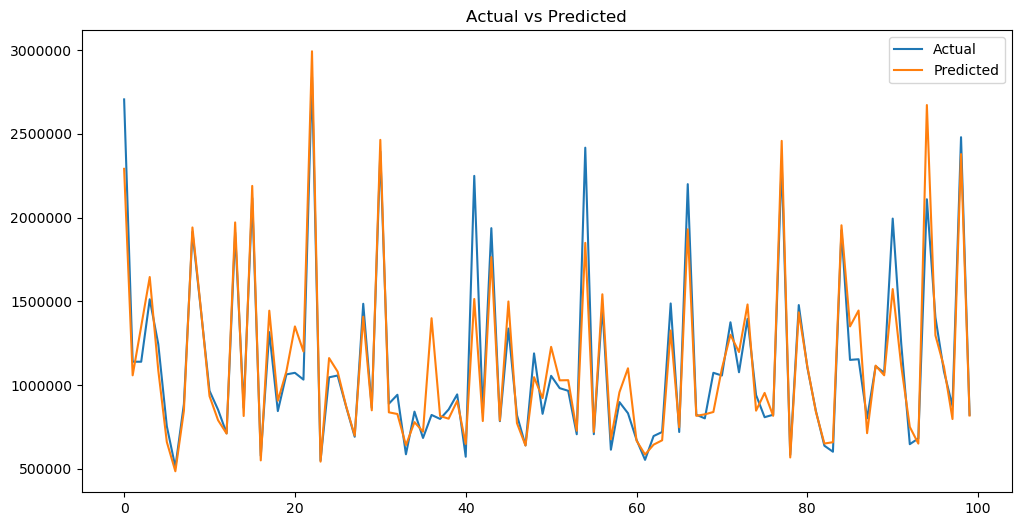

In [6]:
#En iyi çalışan algoritmanın çalıştırılması
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_predict_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test,y_predict_rf))
r2_rf = r2_score(y_test,y_predict_rf)
print('mean absolute error: ',mae_rf)
print('root mean squared error: ',rmse_rf)
print('Coefficient of determination R^2: ',r2_rf)

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

In [7]:
#joblib ile modelin .sav dosyasına kaydedilmesi
import joblib

joblib.dump(rf, "data/rf_model.sav")

['data/rf_model.sav']